Load the South Sudan regions

In [15]:
import geopandas as gpd
import requests
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
regions_gdf = gpd.read_file('/Users/liliiaaliakberova/Desktop/Study/TUe_3_semester/Data_Challenge/JBG060-DC3-23-24-public-main/south-sudan-with-regions_.geojson')

In [5]:
regions_gdf.head

<bound method NDFrame.head of       id                           name  density   
0  11471              Central Equatoria        0  \
1  11470              Eastern Equatoria        0   
2  11476                        Jonglei        0   
3  11474                          Lakes        0   
4  11469  Northern Bahr el Ghazal State        0   
5  11472                    Unity State        0   
6  11477               Upper Nile State        0   
7  11475                         Warrap        0   
8  11478   Western Bahr el Ghazal State        0   
9  11473              Western Equatoria        0   

                                               path   
0              /world/South Sudan/Central Equatoria  \
1              /world/South Sudan/Eastern Equatoria   
2                        /world/South Sudan/Jonglei   
3                          /world/South Sudan/Lakes   
4  /world/South Sudan/Northern Bahr el Ghazal State   
5                    /world/South Sudan/Unity State   
6           

In [6]:
print (regions_gdf.name, regions_gdf.geometry)

0                Central Equatoria
1                Eastern Equatoria
2                          Jonglei
3                            Lakes
4    Northern Bahr el Ghazal State
5                      Unity State
6                 Upper Nile State
7                           Warrap
8     Western Bahr el Ghazal State
9                Western Equatoria
Name: name, dtype: object 0    MULTIPOLYGON (((32.27351 4.79651, 32.26687 4.8...
1    MULTIPOLYGON (((35.94423 4.61914, 35.93833 4.6...
2    MULTIPOLYGON (((35.02196 6.43453, 35.02166 6.4...
3    MULTIPOLYGON (((31.60613 5.99364, 31.59494 6.0...
4    MULTIPOLYGON (((28.03912 9.34789, 27.85675 8.9...
5    MULTIPOLYGON (((30.93877 9.52865, 30.86651 9.5...
6    MULTIPOLYGON (((34.14552 9.03281, 34.13041 9.2...
7    MULTIPOLYGON (((29.67500 8.33275, 29.66464 8.4...
8    MULTIPOLYGON (((28.56355 7.35246, 28.53463 7.4...
9    MULTIPOLYGON (((30.90056 5.60748, 30.87933 5.6...
Name: geometry, dtype: geometry


In [7]:
region_data = regions_gdf[['name', 'geometry']].copy()

region_data.columns = ['Region_Name', 'Geometry']

In [8]:
region_data

,Region_Name,Geometry
0,Central Equatoria,"MULTIPOLYGON (((32.27351 4.79651, 32.26687 4.8..."
1,Eastern Equatoria,"MULTIPOLYGON (((35.94423 4.61914, 35.93833 4.6..."
2,Jonglei,"MULTIPOLYGON (((35.02196 6.43453, 35.02166 6.4..."
3,Lakes,"MULTIPOLYGON (((31.60613 5.99364, 31.59494 6.0..."
4,Northern Bahr el Ghazal State,"MULTIPOLYGON (((28.03912 9.34789, 27.85675 8.9..."
5,Unity State,"MULTIPOLYGON (((30.93877 9.52865, 30.86651 9.5..."
6,Upper Nile State,"MULTIPOLYGON (((34.14552 9.03281, 34.13041 9.2..."
7,Warrap,"MULTIPOLYGON (((29.67500 8.33275, 29.66464 8.4..."
8,Western Bahr el Ghazal State,"MULTIPOLYGON (((28.56355 7.35246, 28.53463 7.4..."
9,Western Equatoria,"MULTIPOLYGON (((30.90056 5.60748, 30.87933 5.6..."


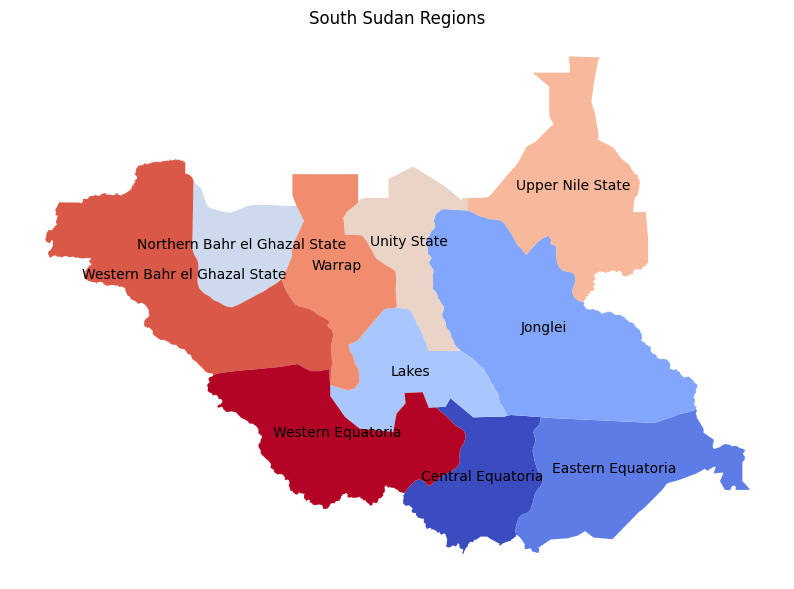

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
regions_gdf.plot(ax=ax, cmap='coolwarm', legend=True, legend_kwds={'label': "Region Names"})

for idx, row in regions_gdf.iterrows():
    ax.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10)

ax.set_title('South Sudan Regions')
ax.set_axis_off()

plt.show()

In [20]:
article_places_df = pd.read_csv('/Users/liliiaaliakberova/Desktop/Study/TUe_3_semester/Data_Challenge/JBG060-DC3-23-24-public-main/data/articles_summary_cleaned.csv')

# Create a GeoDataFrame for places
geometry = [Point(xy) for xy in zip(article_places_df['lng'], article_places_df['lat'])]
places_gdf = gpd.GeoDataFrame(article_places_df, geometry=geometry)


# Perform a spatial join to find which regions intersect with each place
result = gpd.sjoin(places_gdf, regions_gdf, op='intersects')

# Display the result
print(result[['location_article', 'name']])
articles_with_regions =  result[['summary', 'date','location_article', 'lat', 'lng', 'name']]

print(articles_with_regions)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/1r/3fk_x7p96299qsbl_p0t7v6h0000gn/T/ipykernel_22958/3612603964.py:9: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  result = gpd.sjoin(places_gdf, regions_gdf, op='intersects')


                   location_article                          name
0                              Juba             Central Equatoria
4                              Juba             Central Equatoria
8                              Juba             Central Equatoria
10                             Juba             Central Equatoria
11                             Juba             Central Equatoria
...                             ...                           ...
17393        Western Bahr el Ghazal  Western Bahr el Ghazal State
17398                   Kafia Kingi  Western Bahr el Ghazal State
17693        Western Bahr el Ghazal  Western Bahr el Ghazal State
17717  Western Bahr el Ghazal State  Western Bahr el Ghazal State
17952        Western Bahr-el-Ghazal  Western Bahr el Ghazal State

[11785 rows x 2 columns]
                                                 summary        date   
0      The article discusses the passing of the new C...  2011-07-07  \
4      The article discusses the need 

In [21]:
output_csv_path = '/Users/liliiaaliakberova/Desktop/Study/TUe_3_semester/Data_Challenge/JBG060-DC3-23-24-public-main/data/articles_with_regions.csv'
articles_with_regions.to_csv(output_csv_path, index=False)